In [124]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import QuantileTransformer, StandardScaler

### Load CSV

In [125]:
df = pd.read_csv('merge_df.csv')
print(df.shape)

(24937, 1258)


In [126]:
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

display(df)

,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD_x,TRDAR_CD,TOT_FLPOP_CO_x,ML_FLPOP_CO_x,FML_FLPOP_CO_x,AGRDE_10_FLPOP_CO_x,AGRDE_20_FLPOP_CO_x,AGRDE_30_FLPOP_CO_x,...,BUS_STTN_CO,TRDAR_SE_CD,TRDAR_NM,RELM_AR,SIGNGU_CD,ADSTRD_CD,TRDHL_MLSFC_TY_CD,X_VALUE,Y_VALUE,"SHAPE_FRM_INFO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
0,2019,1,A,2110001,178589,78375,100215,31848,17423,17241,...,8.0,A,이북5도청사,104584.43,11110,11110560,3,196192.64,456640.54,"POLYGON ((196385.13 456564.16, 196423.01 45655..."
1,2019,2,A,2110001,171975,75874,96102,30474,16449,17141,...,8.0,A,이북5도청사,104584.43,11110,11110560,3,196192.64,456640.54,"POLYGON ((196385.13 456564.16, 196423.01 45655..."
2,2019,3,A,2110001,131237,59665,71572,23995,13954,12523,...,8.0,A,이북5도청사,104584.43,11110,11110560,3,196192.64,456640.54,"POLYGON ((196385.13 456564.16, 196423.01 45655..."
3,2019,4,A,2110001,150599,68787,81812,27272,16160,14101,...,8.0,A,이북5도청사,104584.43,11110,11110560,3,196192.64,456640.54,"POLYGON ((196385.13 456564.16, 196423.01 45655..."
4,2020,1,A,2110001,185449,83569,101880,33204,19540,17491,...,8.0,A,이북5도청사,104584.43,11110,11110560,3,196192.64,456640.54,"POLYGON ((196385.13 456564.16, 196423.01 45655..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24932,2021,3,R,2130326,154278,69827,84451,25731,15089,26444,...,1.0,R,고덕 골목형상점가,29846.19,11740,11740560,1,215025.66,450949.19,"POLYGON ((215134.35 450979.61, 215077.15 45097..."
24933,2021,4,R,2130326,159978,73096,86882,28652,14747,27373,...,1.0,R,고덕 골목형상점가,29846.19,11740,11740560,1,215025.66,450949.19,"POLYGON ((215134.35 450979.61, 215077.15 45097..."
24934,2022,1,R,2130326,145517,67147,78370,24334,13530,26184,...,1.0,R,고덕 골목형상점가,29846.19,11740,11740560,1,215025.66,450949.19,"POLYGON ((215134.35 450979.61, 215077.15 45097..."
24935,2022,2,R,2130326,138559,63251,75308,24916,12761,23376,...,1.0,R,고덕 골목형상점가,29846.19,11740,11740560,1,215025.66,450949.19,"POLYGON ((215134.35 450979.61, 215077.15 45097..."


### Sorting

In [127]:
df = df.sort_values(by=['STDR_YY_CD', 'STDR_QU_CD'], ascending=[True, True])
df.reset_index(drop=True, inplace=True)
df

,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD_x,TRDAR_CD,TOT_FLPOP_CO_x,ML_FLPOP_CO_x,FML_FLPOP_CO_x,AGRDE_10_FLPOP_CO_x,AGRDE_20_FLPOP_CO_x,AGRDE_30_FLPOP_CO_x,...,BUS_STTN_CO,TRDAR_SE_CD,TRDAR_NM,RELM_AR,SIGNGU_CD,ADSTRD_CD,TRDHL_MLSFC_TY_CD,X_VALUE,Y_VALUE,"SHAPE_FRM_INFO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
0,2019,1,A,2110001,178589,78375,100215,31848,17423,17241,...,8.0,A,이북5도청사,104584.43,11110,11110560,3,196192.64,456640.54,"POLYGON ((196385.13 456564.16, 196423.01 45655..."
1,2019,1,A,2110002,317569,145789,171780,56605,39340,33814,...,3.0,A,독립문역 1번,29573.31,11110,11110570,3,196220.41,452888.98,"POLYGON ((196284.07 452869.05, 196297.73 45287..."
2,2019,1,A,2110003,374230,164061,210169,66620,45083,40011,...,9.0,A,세검정초등학교,175885.74,11110,11110550,3,196361.96,456101.50,"POLYGON ((196562.84 455802.27, 196585.98 45587..."
3,2019,1,A,2110004,331428,152226,179202,63150,38307,41521,...,2.0,A,대신고등학교,17562.32,11110,11110570,3,196514.67,452638.79,"POLYGON ((196428.47 452602.7, 196482.45 452528..."
4,2019,1,A,2110005,144677,61534,83142,21007,17300,17292,...,6.0,A,세검정,216966.61,11110,11110550,3,196654.93,455709.32,"POLYGON ((196688.8 455515.85, 196693.65 455558..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24932,2022,3,R,2130322,254824,125456,129369,32889,32452,40365,...,1.0,R,고분다리전통시장,31694.76,11740,11740620,1,211756.18,449197.37,"POLYGON ((211839.82 449199.78, 211913.77 44915..."
24933,2022,3,R,2130323,343847,165124,178722,50900,45451,43897,...,0.0,R,둔촌역전통시장,36518.94,11740,11740660,1,211871.66,447600.26,"POLYGON ((211971 447606.42, 211989.13 447668.6..."
24934,2022,3,R,2130324,486493,223362,263130,79013,55345,68549,...,0.0,R,길동복조리시장,29606.26,11740,11740685,1,212687.86,448833.99,"POLYGON ((212668.92 448738.36, 212681.88 44878..."
24935,2022,3,R,2130325,203108,89846,113262,35654,21756,26649,...,0.0,R,명일전통시장,27659.96,11740,11740530,1,212842.59,449984.88,"POLYGON ((212883.58 450016.68, 212889.01 45006..."


In [128]:
df[(df['STDR_YY_CD'] == 2022) & (df['STDR_QU_CD'] == 3)].index[0]

23274

In [129]:
train_df = df.loc[:23273]
train_df.to_csv('train_df.csv', index=False)
test_df = df.loc[23274:]
test_df.to_csv('test_df.csv', index=False)

In [130]:
display(train_df)
display(test_df)

,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD_x,TRDAR_CD,TOT_FLPOP_CO_x,ML_FLPOP_CO_x,FML_FLPOP_CO_x,AGRDE_10_FLPOP_CO_x,AGRDE_20_FLPOP_CO_x,AGRDE_30_FLPOP_CO_x,...,BUS_STTN_CO,TRDAR_SE_CD,TRDAR_NM,RELM_AR,SIGNGU_CD,ADSTRD_CD,TRDHL_MLSFC_TY_CD,X_VALUE,Y_VALUE,"SHAPE_FRM_INFO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
0,2019,1,A,2110001,178589,78375,100215,31848,17423,17241,...,8.0,A,이북5도청사,104584.43,11110,11110560,3,196192.64,456640.54,"POLYGON ((196385.13 456564.16, 196423.01 45655..."
1,2019,1,A,2110002,317569,145789,171780,56605,39340,33814,...,3.0,A,독립문역 1번,29573.31,11110,11110570,3,196220.41,452888.98,"POLYGON ((196284.07 452869.05, 196297.73 45287..."
2,2019,1,A,2110003,374230,164061,210169,66620,45083,40011,...,9.0,A,세검정초등학교,175885.74,11110,11110550,3,196361.96,456101.50,"POLYGON ((196562.84 455802.27, 196585.98 45587..."
3,2019,1,A,2110004,331428,152226,179202,63150,38307,41521,...,2.0,A,대신고등학교,17562.32,11110,11110570,3,196514.67,452638.79,"POLYGON ((196428.47 452602.7, 196482.45 452528..."
4,2019,1,A,2110005,144677,61534,83142,21007,17300,17292,...,6.0,A,세검정,216966.61,11110,11110550,3,196654.93,455709.32,"POLYGON ((196688.8 455515.85, 196693.65 455558..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23269,2022,2,R,2130322,261344,126224,135119,32274,32818,39856,...,1.0,R,고분다리전통시장,31694.76,11740,11740620,1,211756.18,449197.37,"POLYGON ((211839.82 449199.78, 211913.77 44915..."
23270,2022,2,R,2130323,330904,158816,172088,47156,44216,42378,...,0.0,R,둔촌역전통시장,36518.94,11740,11740660,1,211871.66,447600.26,"POLYGON ((211971 447606.42, 211989.13 447668.6..."
23271,2022,2,R,2130324,482114,219228,262886,78473,55491,67182,...,0.0,R,길동복조리시장,29606.26,11740,11740685,1,212687.86,448833.99,"POLYGON ((212668.92 448738.36, 212681.88 44878..."
23272,2022,2,R,2130325,189755,83274,106482,32958,20106,25482,...,0.0,R,명일전통시장,27659.96,11740,11740530,1,212842.59,449984.88,"POLYGON ((212883.58 450016.68, 212889.01 45006..."


,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD_x,TRDAR_CD,TOT_FLPOP_CO_x,ML_FLPOP_CO_x,FML_FLPOP_CO_x,AGRDE_10_FLPOP_CO_x,AGRDE_20_FLPOP_CO_x,AGRDE_30_FLPOP_CO_x,...,BUS_STTN_CO,TRDAR_SE_CD,TRDAR_NM,RELM_AR,SIGNGU_CD,ADSTRD_CD,TRDHL_MLSFC_TY_CD,X_VALUE,Y_VALUE,"SHAPE_FRM_INFO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
23274,2022,3,A,2110001,167429,73349,94081,28524,18267,17572,...,8.0,A,이북5도청사,104584.43,11110,11110560,3,196192.64,456640.54,"POLYGON ((196385.13 456564.16, 196423.01 45655..."
23275,2022,3,A,2110002,329732,151616,178116,64124,43716,39707,...,3.0,A,독립문역 1번,29573.31,11110,11110570,3,196220.41,452888.98,"POLYGON ((196284.07 452869.05, 196297.73 45287..."
23276,2022,3,A,2110003,362640,164115,198525,70277,40800,38416,...,9.0,A,세검정초등학교,175885.74,11110,11110550,3,196361.96,456101.50,"POLYGON ((196562.84 455802.27, 196585.98 45587..."
23277,2022,3,A,2110004,376898,176647,200251,75637,43871,49402,...,2.0,A,대신고등학교,17562.32,11110,11110570,3,196514.67,452638.79,"POLYGON ((196428.47 452602.7, 196482.45 452528..."
23278,2022,3,A,2110005,162150,71565,90585,30301,16016,19002,...,6.0,A,세검정,216966.61,11110,11110550,3,196654.93,455709.32,"POLYGON ((196688.8 455515.85, 196693.65 455558..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24932,2022,3,R,2130322,254824,125456,129369,32889,32452,40365,...,1.0,R,고분다리전통시장,31694.76,11740,11740620,1,211756.18,449197.37,"POLYGON ((211839.82 449199.78, 211913.77 44915..."
24933,2022,3,R,2130323,343847,165124,178722,50900,45451,43897,...,0.0,R,둔촌역전통시장,36518.94,11740,11740660,1,211871.66,447600.26,"POLYGON ((211971 447606.42, 211989.13 447668.6..."
24934,2022,3,R,2130324,486493,223362,263130,79013,55345,68549,...,0.0,R,길동복조리시장,29606.26,11740,11740685,1,212687.86,448833.99,"POLYGON ((212668.92 448738.36, 212681.88 44878..."
24935,2022,3,R,2130325,203108,89846,113262,35654,21756,26649,...,0.0,R,명일전통시장,27659.96,11740,11740530,1,212842.59,449984.88,"POLYGON ((212883.58 450016.68, 212889.01 45006..."


## Data Preprocessing

In [131]:
train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')

In [132]:
# Data Shuffle
train_df = train_df.sample(frac=1, random_state=0).reset_index(drop=True)
test_df

,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD_x,TRDAR_CD,TOT_FLPOP_CO_x,ML_FLPOP_CO_x,FML_FLPOP_CO_x,AGRDE_10_FLPOP_CO_x,AGRDE_20_FLPOP_CO_x,AGRDE_30_FLPOP_CO_x,...,BUS_STTN_CO,TRDAR_SE_CD,TRDAR_NM,RELM_AR,SIGNGU_CD,ADSTRD_CD,TRDHL_MLSFC_TY_CD,X_VALUE,Y_VALUE,"SHAPE_FRM_INFO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
0,2022,3,A,2110001,167429,73349,94081,28524,18267,17572,...,8.0,A,이북5도청사,104584.43,11110,11110560,3,196192.64,456640.54,"POLYGON ((196385.13 456564.16, 196423.01 45655..."
1,2022,3,A,2110002,329732,151616,178116,64124,43716,39707,...,3.0,A,독립문역 1번,29573.31,11110,11110570,3,196220.41,452888.98,"POLYGON ((196284.07 452869.05, 196297.73 45287..."
2,2022,3,A,2110003,362640,164115,198525,70277,40800,38416,...,9.0,A,세검정초등학교,175885.74,11110,11110550,3,196361.96,456101.50,"POLYGON ((196562.84 455802.27, 196585.98 45587..."
3,2022,3,A,2110004,376898,176647,200251,75637,43871,49402,...,2.0,A,대신고등학교,17562.32,11110,11110570,3,196514.67,452638.79,"POLYGON ((196428.47 452602.7, 196482.45 452528..."
4,2022,3,A,2110005,162150,71565,90585,30301,16016,19002,...,6.0,A,세검정,216966.61,11110,11110550,3,196654.93,455709.32,"POLYGON ((196688.8 455515.85, 196693.65 455558..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,2022,3,R,2130322,254824,125456,129369,32889,32452,40365,...,1.0,R,고분다리전통시장,31694.76,11740,11740620,1,211756.18,449197.37,"POLYGON ((211839.82 449199.78, 211913.77 44915..."
1659,2022,3,R,2130323,343847,165124,178722,50900,45451,43897,...,0.0,R,둔촌역전통시장,36518.94,11740,11740660,1,211871.66,447600.26,"POLYGON ((211971 447606.42, 211989.13 447668.6..."
1660,2022,3,R,2130324,486493,223362,263130,79013,55345,68549,...,0.0,R,길동복조리시장,29606.26,11740,11740685,1,212687.86,448833.99,"POLYGON ((212668.92 448738.36, 212681.88 44878..."
1661,2022,3,R,2130325,203108,89846,113262,35654,21756,26649,...,0.0,R,명일전통시장,27659.96,11740,11740530,1,212842.59,449984.88,"POLYGON ((212883.58 450016.68, 212889.01 45006..."


In [133]:
# Data Transformation
train_data = train_df.values
test_data = test_df.values
print(train_data.shape, test_data.shape)

(23274, 1258) (1663, 1258)


In [134]:
header = train_df.columns
for idx, head in enumerate(header):
    print(idx, head)

0 STDR_YY_CD
1 STDR_QU_CD
2 TRDAR_SE_CD_x
3 TRDAR_CD
4 TOT_FLPOP_CO_x
5 ML_FLPOP_CO_x
6 FML_FLPOP_CO_x
7 AGRDE_10_FLPOP_CO_x
8 AGRDE_20_FLPOP_CO_x
9 AGRDE_30_FLPOP_CO_x
10 AGRDE_40_FLPOP_CO_x
11 AGRDE_50_FLPOP_CO_x
12 AGRDE_60_ABOVE_FLPOP_CO_x
13 TMZON_1_FLPOP_CO_x
14 TMZON_2_FLPOP_CO_x
15 TMZON_3_FLPOP_CO_x
16 TMZON_4_FLPOP_CO_x
17 TMZON_5_FLPOP_CO_x
18 TMZON_6_FLPOP_CO_x
19 MON_FLPOP_CO_x
20 TUES_FLPOP_CO_x
21 WED_FLPOP_CO_x
22 THUR_FLPOP_CO_x
23 FRI_FLPOP_CO_x
24 SAT_FLPOP_CO_x
25 SUN_FLPOP_CO_x
26 MAG_10_MONTM_1_FLPOP_CO_x
27 MAG_10_MONTM_2_FLPOP_CO_x
28 MAG_10_MONTM_3_FLPOP_CO_x
29 MAG_10_MONTM_4_FLPOP_CO_x
30 MAG_10_MONTM_5_FLPOP_CO_x
31 MAG_10_MONTM_6_FLPOP_CO_x
32 MAG_10_TUETM_1_FLPOP_CO_x
33 MAG_10_TUETM_2_FLPOP_CO_x
34 MAG_10_TUETM_3_FLPOP_CO_x
35 MAG_10_TUETM_4_FLPOP_CO_x
36 MAG_10_TUETM_5_FLPOP_CO_x
37 MAG_10_TUETM_6_FLPOP_CO_x
38 MAG_10_WEDTM_1_FLPOP_CO_x
39 MAG_10_WEDTM_2_FLPOP_CO_x
40 MAG_10_WEDTM_3_FLPOP_CO_x
41 MAG_10_WEDTM_4_FLPOP_CO_x
42 MAG_10_WEDTM_5_FLPOP_CO_x
43 

In [135]:
"""
530: 상권 면적
532: 상권 전체의 분기당 매출
603: 점포 수

< 532 유효 데이터 수 >
train = 17294
test = 1216
"""

"""
L = [530, 603, 1255, 1256, 550,
    551, 555, 552, 556,
    524, 4, 8, 12, 16, 13, 25,
    1177, 1157, 1211, 1212, 1210,
    1209, 1213, 1208, 1205]
"""

# 필요한 데이터만 collect
L = [530, 603, 1255, 1256, 550, 551, 555, 552, 556, 524,
     4, 8, 12, 16, 13, 25, 1177, 1157, 1211, 1212,
     1210, 1209, 1213, 1208, 1205, 534, 544, 540, 23, 5,
     1159, 1162, 1206, 1229, 1204, 1197, 606, 611, 608, 610,
     1240, 1234, 1248, 1247, 1230, 1233, 1243, 1239, 1232] # 49개의 변수

L.append(532)

train = train_data[:, L]
test = test_data[:, L]

# Data Cleaning
train = np.array(train, dtype=float)
is_row_nan = np.isnan(train).any(axis=1)
train = train[np.logical_not(is_row_nan), :]

test = np.array(test, dtype=float)
is_row_nan = np.isnan(test).any(axis=1)
test = test[np.logical_not(is_row_nan), :]

print(train.shape, test.shape)

# Nan 데이터를 제거한 유효 데이터 비율
valid_train = train.shape[0] / 17294
valid_test = test.shape[0] / 1216
print(valid_train, valid_test)

# 90% train, 10% valid
split_point = int(train.shape[0]*0.9)
print('split point:', split_point)

(16338, 50) (1145, 50)
0.9447207123857986 0.9416118421052632
split point: 14704


In [136]:
"""
# Data Scaling (가우스 랭크)
scaler = QuantileTransformer(output_distribution='normal')
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)
"""

# Data Scaling
scaler = StandardScaler()
scaler.fit(train)
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

# Split data into training and test sets
train_data = train_scaled[:split_point, :]
val_data = train_scaled[split_point:, :]
test_data = test_scaled

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_val, y_val = val_data[:, :-1], val_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

X_train

array([[-1.01916244, -0.4895976 ,  0.2898587 , ..., -0.20965479,
        -0.21381211, -0.13865249],
       [-0.75261861, -0.44434312, -1.50094997, ..., -0.20965479,
        -0.21381211, -0.13865249],
       [ 0.23324281,  0.18921956, -0.28186016, ..., -0.20965479,
        10.44179197, -0.13865249],
       ...,
       [-0.55574047, -0.4895976 , -0.87169983, ..., -0.20965479,
        -0.21381211, -0.13865249],
       [ 0.60788504, -0.15018902, -0.98899121, ..., -0.20965479,
        -0.21381211, -0.13865249],
       [ 1.06861346,  1.43371768,  1.3810702 , ..., -0.20965479,
        -0.21381211, -0.13865249]])

In [137]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest regression model
rf = RandomForestRegressor(n_estimators=500, max_leaf_nodes = 16,
                           random_state=0)
rf.fit(X_train, y_train)

# Get the Random Forest predictions on the training set
rf_train_preds = rf.predict(X_train)

# Add the Random Forest predictions as a new feature in the training data
X_train_stacked = np.column_stack((X_train, rf_train_preds))

In [138]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Get the Random Forest predictions on the val set
rf_val_preds = rf.predict(X_val)

# Add the Random Forest predictions as a new feature in the val data
X_val_stacked = np.column_stack((X_val, rf_val_preds))

# Get the Random Forest predictions on the test set
rf_test_preds = rf.predict(X_test)

# Add the Random Forest predictions as a new feature in the test data
X_test_stacked = np.column_stack((X_test, rf_test_preds))

## PCA

In [139]:
from sklearn.decomposition import PCA
"""
# initialize PCA model with number of components desired
pca = PCA(n_components = 0.95)

# fit PCA model to the data
pca.fit(X_train_stacked)

# transform data to reduced dimensions
X_train_stacked = pca.transform(X_train_stacked)
X_val_stacked = pca.transform(X_val_stacked)
X_test_stacked = pca.transform(X_test_stacked)

print(X_train_stacked.shape)
"""

'\n# initialize PCA model with number of components desired\npca = PCA(n_components = 0.95)\n\n# fit PCA model to the data\npca.fit(X_train_stacked)\n\n# transform data to reduced dimensions\nX_train_stacked = pca.transform(X_train_stacked)\nX_val_stacked = pca.transform(X_val_stacked)\nX_test_stacked = pca.transform(X_test_stacked)\n\nprint(X_train_stacked.shape)\n'

In [140]:
# Train the model
history = model.fit(X_train_stacked, y_train, epochs=200,
                    validation_data=(X_val_stacked, y_val))

# Evaluate the model on the test data
model.evaluate(X_test_stacked, y_test)

Epoch 1/200
460/460 [==============================] - 1s 2ms/step - loss: 0.2374 - val_loss: 0.2042
Epoch 2/200
460/460 [==============================] - 1s 1ms/step - loss: 0.1079 - val_loss: 0.1352
Epoch 3/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0851 - val_loss: 0.1110
Epoch 4/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0843 - val_loss: 0.1162
Epoch 5/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0734 - val_loss: 0.1518
Epoch 6/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0616 - val_loss: 0.1031
Epoch 7/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0703 - val_loss: 0.1262
Epoch 8/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0540 - val_loss: 0.0870
Epoch 9/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0564 - val_loss: 0.0672
Epoch 10/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0488 - val_lo

460/460 [==============================] - 1s 1ms/step - loss: 0.0163 - val_loss: 0.0757
Epoch 82/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0181 - val_loss: 0.0765
Epoch 83/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0171 - val_loss: 0.1043
Epoch 84/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0184 - val_loss: 0.0856
Epoch 85/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0179 - val_loss: 0.0858
Epoch 86/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0159 - val_loss: 0.1057
Epoch 87/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0165 - val_loss: 0.0883
Epoch 88/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0180 - val_loss: 0.0825
Epoch 89/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0170 - val_loss: 0.1046
Epoch 90/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0161 - val_loss: 

Epoch 161/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0101 - val_loss: 0.0696
Epoch 162/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0127 - val_loss: 0.0703
Epoch 163/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0109 - val_loss: 0.0736
Epoch 164/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0108 - val_loss: 0.0682
Epoch 165/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0108 - val_loss: 0.0712
Epoch 166/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0107 - val_loss: 0.0679
Epoch 167/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0108 - val_loss: 0.0768
Epoch 168/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0102 - val_loss: 0.0743
Epoch 169/200
460/460 [==============================] - 1s 1ms/step - loss: 0.0103 - val_loss: 0.0972
Epoch 170/200
460/460 [==============================] - 1s 2ms/step - lo

0.0710807517170906

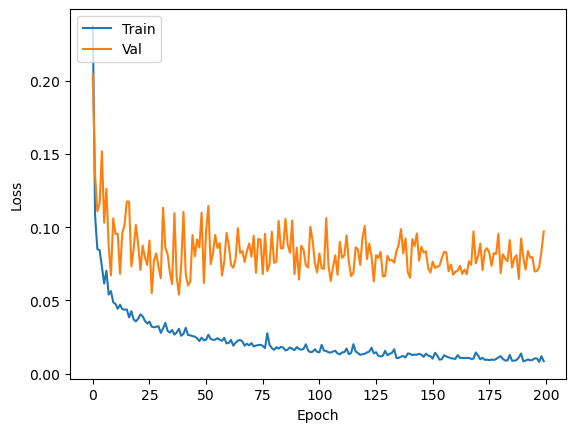

In [141]:
# 모델 성능 지표
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

36/36 [==============================] - 0s 993us/step


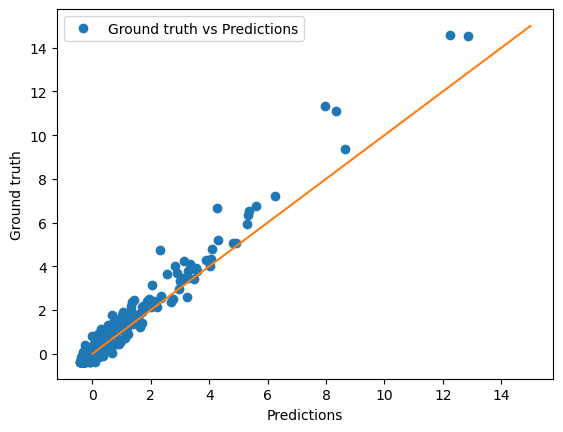

In [142]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test_stacked)
plt.plot(predictions, y_test, 'o', label='Ground truth vs Predictions')
plt.plot((0, 15), (0, 15))

plt.xlabel('Predictions')
plt.ylabel('Ground truth')
plt.legend()
plt.show()

C:\Users\Poco\AppData\Local\Temp\ipykernel_22636\837818788.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(predictions), np.log(y_test), 'o', label='Ground truth vs Predictions')


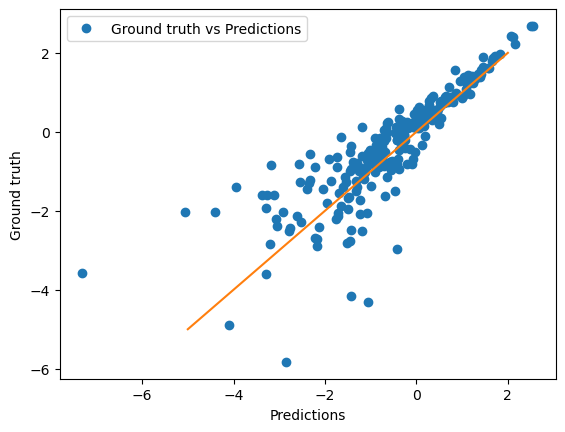

In [143]:
# 로그 스케일로 그래프 출력
plt.plot(np.log(predictions), np.log(y_test), 'o',
         label='Ground truth vs Predictions')
plt.plot((-5, 2), (-5, 2))
plt.xlabel('Predictions')
plt.ylabel('Ground truth')
plt.legend()
plt.show()

In [144]:
test_df

,STDR_YY_CD,STDR_QU_CD,TRDAR_SE_CD_x,TRDAR_CD,TOT_FLPOP_CO_x,ML_FLPOP_CO_x,FML_FLPOP_CO_x,AGRDE_10_FLPOP_CO_x,AGRDE_20_FLPOP_CO_x,AGRDE_30_FLPOP_CO_x,...,BUS_STTN_CO,TRDAR_SE_CD,TRDAR_NM,RELM_AR,SIGNGU_CD,ADSTRD_CD,TRDHL_MLSFC_TY_CD,X_VALUE,Y_VALUE,"SHAPE_FRM_INFO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
0,2022,3,A,2110001,167429,73349,94081,28524,18267,17572,...,8.0,A,이북5도청사,104584.43,11110,11110560,3,196192.64,456640.54,"POLYGON ((196385.13 456564.16, 196423.01 45655..."
1,2022,3,A,2110002,329732,151616,178116,64124,43716,39707,...,3.0,A,독립문역 1번,29573.31,11110,11110570,3,196220.41,452888.98,"POLYGON ((196284.07 452869.05, 196297.73 45287..."
2,2022,3,A,2110003,362640,164115,198525,70277,40800,38416,...,9.0,A,세검정초등학교,175885.74,11110,11110550,3,196361.96,456101.50,"POLYGON ((196562.84 455802.27, 196585.98 45587..."
3,2022,3,A,2110004,376898,176647,200251,75637,43871,49402,...,2.0,A,대신고등학교,17562.32,11110,11110570,3,196514.67,452638.79,"POLYGON ((196428.47 452602.7, 196482.45 452528..."
4,2022,3,A,2110005,162150,71565,90585,30301,16016,19002,...,6.0,A,세검정,216966.61,11110,11110550,3,196654.93,455709.32,"POLYGON ((196688.8 455515.85, 196693.65 455558..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,2022,3,R,2130322,254824,125456,129369,32889,32452,40365,...,1.0,R,고분다리전통시장,31694.76,11740,11740620,1,211756.18,449197.37,"POLYGON ((211839.82 449199.78, 211913.77 44915..."
1659,2022,3,R,2130323,343847,165124,178722,50900,45451,43897,...,0.0,R,둔촌역전통시장,36518.94,11740,11740660,1,211871.66,447600.26,"POLYGON ((211971 447606.42, 211989.13 447668.6..."
1660,2022,3,R,2130324,486493,223362,263130,79013,55345,68549,...,0.0,R,길동복조리시장,29606.26,11740,11740685,1,212687.86,448833.99,"POLYGON ((212668.92 448738.36, 212681.88 44878..."
1661,2022,3,R,2130325,203108,89846,113262,35654,21756,26649,...,0.0,R,명일전통시장,27659.96,11740,11740530,1,212842.59,449984.88,"POLYGON ((212883.58 450016.68, 212889.01 45006..."


In [145]:
def Result(num):
    # num을 선택할 때에는 nan 데이터가 포함되어 있지 않은 데이터인지 확인해야 한다.
    Xy = test_df.loc[num][L]
    N = 1000
    Xy = np.tile(Xy, (N, 1))
    Xy[:, 1] = np.arange(1, N+1)
    
    Xy = scaler.transform(Xy)
    
    X = Xy[:, :-1]
    y = Xy[:, -1]
    
    # Get the Random Forest predictions on the set
    rf_preds = rf.predict(X)

    # Add the Random Forest predictions as a new feature in the data
    X_stacked = np.column_stack((X, rf_preds))
    pred = model.predict(X_stacked)
    pred = np.tile(pred, (1, len(L)))
    pred = scaler.inverse_transform(pred)
    # 분기별 매출에서 3달 나눔
    result = pred[:, -1].reshape(N)/(3*np.arange(1, N+1))
    return result

def IMG(num, M = 5, N = 300):
    result = Result(num)
    plt.xlim(M, N)
    plt.ylim(0,3e7)
    
    standard = 18784031 ################## STANDARD ####################

    plt.axhline(standard, color='red')
    plt.axvline(test_df.loc[num][603], color='green')

    plt.xlabel('Number of stores')
    plt.ylabel('Expected revenue per store')
    
    x = np.arange(N)
    plt.plot(x, result[:N])

    # Find the difference between the two y values
    y_diff = result - standard
    y_abs_diff = abs(y_diff)
    
    intersection_x = np.argmin(y_abs_diff)
    print(intersection_x)

    # Plot the two functions and the intersection point
    x = int(intersection_x)
    y = int(result[int(intersection_x)])
    
    t = test_df.loc[num][603]
    t = int(t)

    plt.scatter(t, int(result[t]), color='green', label='now')
    plt.annotate(f'({t}, {int(result[t])})', (t, int(result[t])), textcoords='offset points', xytext=(50, 15), ha='center', va='bottom',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2', color='black'))
    
    plt.scatter(x, y, color='red', label='pred')
    
    plt.annotate(f'({x}, {y})', (x, y), textcoords='offset points', xytext=(50, 15), ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2', color='black'))

    plt.legend()

    # Show the plot
    plt.show()

def Analysis(num):
    try:
        result = Result(num)
        standard = 18784031 ################## STANDARD ####################

        y_diff = result - standard
        y_abs_diff = abs(y_diff)
        intersection_x = np.argmin(y_abs_diff)
    except:
        return 0
    
    print(num)
    return int(intersection_x) - test_df.loc[num][603]

print(Analysis(130))

32/32 [==============================] - 0s 782us/step
130
0.0


32/32 [==============================] - 0s 760us/step
49


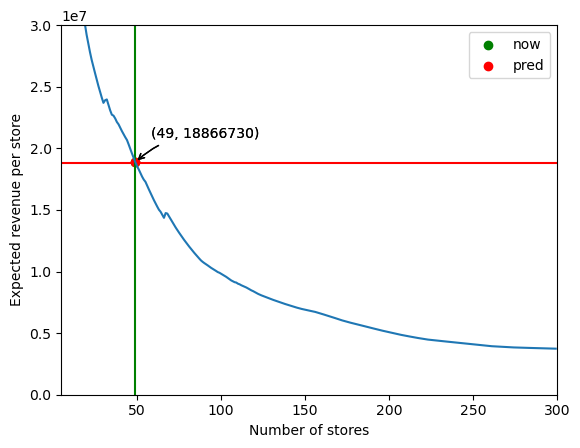

In [146]:
IMG(130) # 성수동카페거리; 2110131; 골목상권

32/32 [==============================] - 0s 679us/step
126


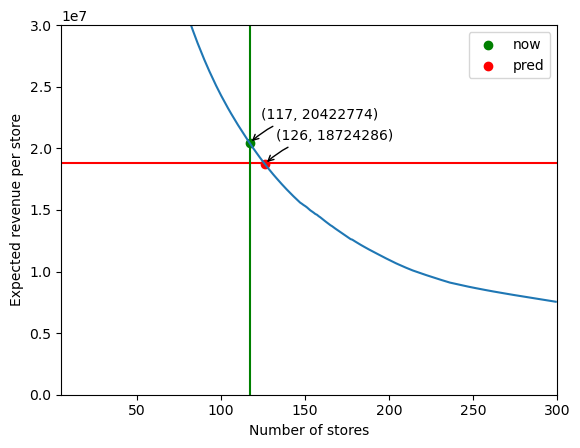

In [147]:
IMG(1275) # 가로수길; 2120186; 발달상권

32/32 [==============================] - 0s 794us/step
9


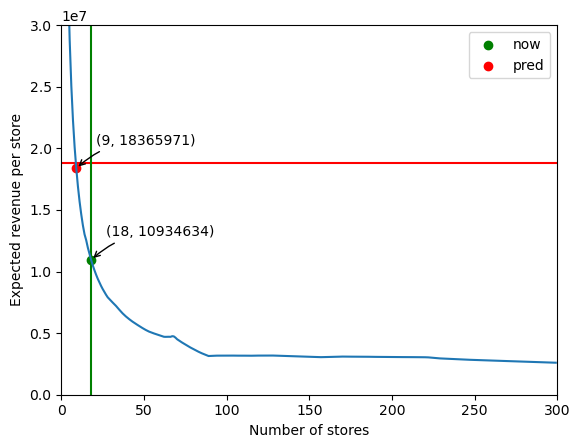

In [148]:
IMG(1102, 0) # 송파나루역 1번(송리단길); 2111013; 골목상권

32/32 [==============================] - 0s 572us/step
1


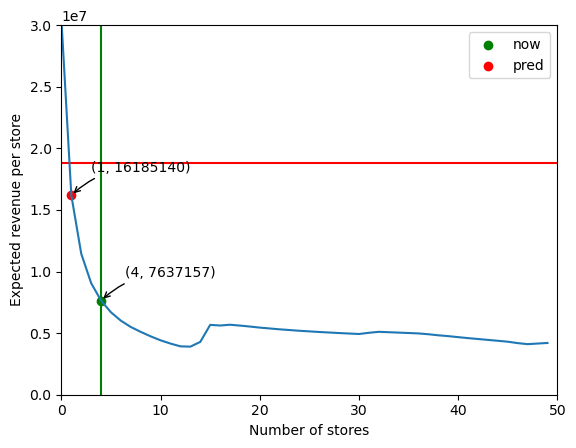

In [149]:
IMG(1, 0, 50) # 2110002;

32/32 [==============================] - 0s 642us/step
0
32/32 [==============================] - 0s 1ms/step
0
32/32 [==============================] - 0s 802us/step
1
32/32 [==============================] - 0s 657us/step
1
32/32 [==============================] - 0s 766us/step
2
32/32 [==============================] - 0s 683us/step
5
32/32 [==============================] - 0s 671us/step
5
32/32 [==============================] - 0s 609us/step
6
32/32 [==============================] - 0s 714us/step
6
32/32 [==============================] - 0s 948us/step
7
32/32 [==============================] - 0s 747us/step
7
32/32 [==============================] - 0s 635us/step
8
32/32 [==============================] - 0s 674us/step
9
32/32 [==============================] - 0s 1ms/step
9
32/32 [==============================] - 0s 662us/step
11
32/32 [==============================] - 0s 558us/step
11
32/32 [==============================] - 0s 636us/step
13
32/32 [=========================

32/32 [==============================] - 0s 1ms/step
148
32/32 [==============================] - 0s 1ms/step
149
32/32 [==============================] - 0s 1ms/step
150
32/32 [==============================] - 0s 504us/step
151
32/32 [==============================] - 0s 1ms/step
151
32/32 [==============================] - 0s 504us/step
153
32/32 [==============================] - 0s 616us/step
154
32/32 [==============================] - 0s 661us/step
155
32/32 [==============================] - 0s 645us/step
156
32/32 [==============================] - 0s 645us/step
157
32/32 [==============================] - 0s 645us/step
158
32/32 [==============================] - 0s 645us/step
159
32/32 [==============================] - 0s 581us/step
160
32/32 [==============================] - 0s 645us/step
161
32/32 [==============================] - 0s 645us/step
162
32/32 [==============================] - 0s 623us/step
164
32/32 [==============================] - 0s 581us/step
165
32/32

32/32 [==============================] - 0s 645us/step
305
32/32 [==============================] - 0s 613us/step
306
32/32 [==============================] - 0s 775us/step
306
32/32 [==============================] - 0s 581us/step
307
32/32 [==============================] - 0s 613us/step
308
32/32 [==============================] - 0s 645us/step
311
32/32 [==============================] - 0s 629us/step
312
32/32 [==============================] - 0s 710us/step
313
32/32 [==============================] - 0s 581us/step
314
32/32 [==============================] - 0s 622us/step
315
32/32 [==============================] - 0s 677us/step
315
32/32 [==============================] - 0s 677us/step
316
32/32 [==============================] - 0s 710us/step
318
32/32 [==============================] - 0s 694us/step
320
32/32 [==============================] - 0s 613us/step
320
32/32 [==============================] - 0s 324us/step
322
32/32 [==============================] - 0s 504us/step
3

32/32 [==============================] - 0s 504us/step
455
32/32 [==============================] - 0s 505us/step
456
32/32 [==============================] - 0s 860us/step
456
32/32 [==============================] - 0s 504us/step
457
32/32 [==============================] - 0s 1ms/step
458
32/32 [==============================] - 0s 504us/step
459
32/32 [==============================] - 0s 518us/step
460
32/32 [==============================] - 0s 504us/step
461
32/32 [==============================] - 0s 504us/step
461
32/32 [==============================] - 0s 403us/step
462
32/32 [==============================] - 0s 1ms/step
462
32/32 [==============================] - 0s 504us/step
463
32/32 [==============================] - 0s 504us/step
464
32/32 [==============================] - 0s 1ms/step
466
32/32 [==============================] - 0s 504us/step
467
32/32 [==============================] - 0s 503us/step
468
32/32 [==============================] - 0s 519us/step
469
32/

32/32 [==============================] - 0s 504us/step
597
32/32 [==============================] - 0s 506us/step
598
32/32 [==============================] - 0s 1ms/step
598
32/32 [==============================] - 0s 504us/step
599
32/32 [==============================] - 0s 1ms/step
599
32/32 [==============================] - 0s 517us/step
600
32/32 [==============================] - 0s 504us/step
602
32/32 [==============================] - 0s 505us/step
602
32/32 [==============================] - 0s 505us/step
603
32/32 [==============================] - 0s 908us/step
603
32/32 [==============================] - 0s 504us/step
605
32/32 [==============================] - 0s 505us/step
605
32/32 [==============================] - 0s 519us/step
607
32/32 [==============================] - 0s 504us/step
607
32/32 [==============================] - 0s 785us/step
610
32/32 [==============================] - 0s 878us/step
610
32/32 [==============================] - 0s 505us/step
611
3

32/32 [==============================] - 0s 504us/step
725
32/32 [==============================] - 0s 975us/step
725
32/32 [==============================] - 0s 517us/step
726
32/32 [==============================] - 0s 1ms/step
726
32/32 [==============================] - 0s 504us/step
727
32/32 [==============================] - 0s 859us/step
727
32/32 [==============================] - 0s 504us/step
728
32/32 [==============================] - 0s 504us/step
729
32/32 [==============================] - 0s 504us/step
729
32/32 [==============================] - 0s 746us/step
730
32/32 [==============================] - 0s 504us/step
730
32/32 [==============================] - 0s 504us/step
731
32/32 [==============================] - 0s 389us/step
734
32/32 [==============================] - 0s 504us/step
735
32/32 [==============================] - 0s 1ms/step
735
32/32 [==============================] - 0s 1ms/step
737
32/32 [==============================] - 0s 715us/step
739
32/

32/32 [==============================] - 0s 505us/step
894
32/32 [==============================] - 0s 504us/step
895
32/32 [==============================] - 0s 1ms/step
896
32/32 [==============================] - 0s 504us/step
899
32/32 [==============================] - 0s 601us/step
900
32/32 [==============================] - 0s 504us/step
901
32/32 [==============================] - 0s 504us/step
902
32/32 [==============================] - 0s 516us/step
903
32/32 [==============================] - 0s 504us/step
904
32/32 [==============================] - 0s 1ms/step
904
32/32 [==============================] - 0s 145us/step
906
32/32 [==============================] - 0s 504us/step
907
32/32 [==============================] - 0s 504us/step
907
32/32 [==============================] - 0s 504us/step
909
32/32 [==============================] - 0s 1ms/step
909
32/32 [==============================] - 0s 1ms/step
911
32/32 [==============================] - 0s 504us/step
911
32/32

32/32 [==============================] - 0s 1ms/step
1041
32/32 [==============================] - 0s 505us/step
1043
32/32 [==============================] - 0s 504us/step
1045
32/32 [==============================] - 0s 452us/step
1046
32/32 [==============================] - 0s 504us/step
1046
32/32 [==============================] - 0s 504us/step
1048
32/32 [==============================] - 0s 504us/step
1050
32/32 [==============================] - 0s 649us/step
1051
32/32 [==============================] - 0s 1ms/step
1052
32/32 [==============================] - 0s 506us/step
1055
32/32 [==============================] - 0s 485us/step
1055
32/32 [==============================] - 0s 504us/step
1056
32/32 [==============================] - 0s 504us/step
1056
32/32 [==============================] - 0s 604us/step
1057
32/32 [==============================] - 0s 504us/step
1057
32/32 [==============================] - 0s 504us/step
1058
32/32 [==============================] - 0s 

32/32 [==============================] - 0s 504us/step
1158
32/32 [==============================] - 0s 1ms/step
1159
32/32 [==============================] - 0s 517us/step
1160
32/32 [==============================] - 0s 1ms/step
1161
32/32 [==============================] - 0s 2ms/step
1162
32/32 [==============================] - 0s 1ms/step
1163
32/32 [==============================] - 0s 956us/step
1164
32/32 [==============================] - 0s 519us/step
1165
32/32 [==============================] - 0s 1ms/step
1166
32/32 [==============================] - 0s 2ms/step
1167
32/32 [==============================] - 0s 1ms/step
1168
32/32 [==============================] - 0s 1ms/step
1169
32/32 [==============================] - 0s 484us/step
1169
32/32 [==============================] - 0s 730us/step
1170
32/32 [==============================] - 0s 1ms/step
1171
32/32 [==============================] - 0s 1ms/step
1171
32/32 [==============================] - 0s 405us/step
1172


1278
32/32 [==============================] - 0s 1ms/step
1278
32/32 [==============================] - 0s 1ms/step
1279
32/32 [==============================] - 0s 504us/step
1280
32/32 [==============================] - 0s 1ms/step
1281
32/32 [==============================] - 0s 291us/step
1281
32/32 [==============================] - 0s 504us/step
1282
32/32 [==============================] - 0s 1ms/step
1282
32/32 [==============================] - 0s 504us/step
1283
32/32 [==============================] - 0s 504us/step
1284
32/32 [==============================] - 0s 504us/step
1285
32/32 [==============================] - 0s 585us/step
1286
32/32 [==============================] - 0s 504us/step
1286
32/32 [==============================] - 0s 570us/step
1287
32/32 [==============================] - 0s 504us/step
1288
32/32 [==============================] - 0s 1ms/step
1288
32/32 [==============================] - 0s 1ms/step
1289
32/32 [==============================] - 0s 504

32/32 [==============================] - 0s 843us/step
1442
32/32 [==============================] - 0s 517us/step
1443
32/32 [==============================] - 0s 1ms/step
1443
32/32 [==============================] - 0s 504us/step
1445
32/32 [==============================] - 0s 504us/step
1445
32/32 [==============================] - 0s 569us/step
1446
32/32 [==============================] - 0s 504us/step
1446
32/32 [==============================] - 0s 504us/step
1447
32/32 [==============================] - 0s 504us/step
1447
32/32 [==============================] - 0s 536us/step
1448
32/32 [==============================] - 0s 504us/step
1449
32/32 [==============================] - 0s 504us/step
1449
32/32 [==============================] - 0s 602us/step
1451
32/32 [==============================] - 0s 665us/step
1452
32/32 [==============================] - 0s 505us/step
1452
32/32 [==============================] - 0s 504us/step
1453
32/32 [==============================] - 0

32/32 [==============================] - 0s 504us/step
1629
32/32 [==============================] - 0s 504us/step
1630
32/32 [==============================] - 0s 504us/step
1631
32/32 [==============================] - 0s 504us/step
1632
32/32 [==============================] - 0s 1ms/step
1632
32/32 [==============================] - 0s 504us/step
1635
32/32 [==============================] - 0s 500us/step
1635
32/32 [==============================] - 0s 714us/step
1639
32/32 [==============================] - 0s 504us/step
1639
32/32 [==============================] - 0s 504us/step
1642
32/32 [==============================] - 0s 504us/step
1646
32/32 [==============================] - 0s 517us/step
1646
32/32 [==============================] - 0s 1ms/step
1647
32/32 [==============================] - 0s 504us/step
1649
32/32 [==============================] - 0s 505us/step
1650
32/32 [==============================] - 0s 504us/step
1651
32/32 [==============================] - 0s 

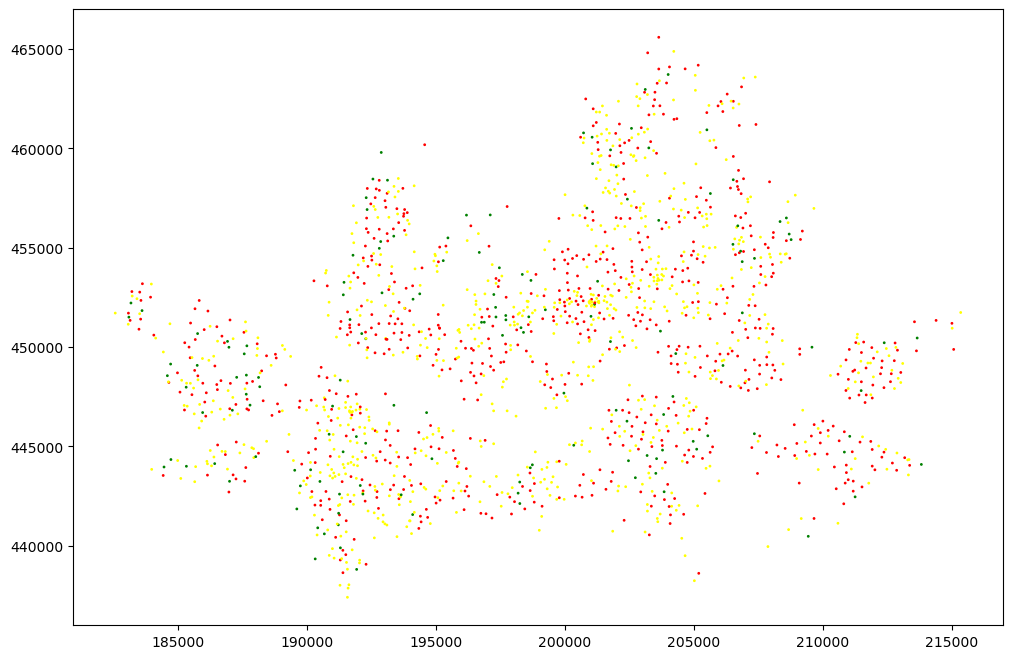

In [151]:
xy = test_df.iloc[:, [2, 3, 1251, 1255, 1256]]

# assign a color to each code
colors_list = ['red' if Analysis(idx) <= -5
               else 'yellow' if Analysis(idx) <= 5
               else 'green' for idx in xy.index]

fig = plt.figure(figsize=(12, 8))

# plot the points with different colors based on the code
plt.scatter(xy['X_VALUE'], xy['Y_VALUE'], c=colors_list, s=1)

plt.show()

In [152]:
import h5py
model.save('Whiskey.h5')